Morgan and Winship Chapter 11  
Repeated Observations and the Estimation of Causal Effects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

If potential outcomes evolve in predictable ways, then it may be possible to predict counterfactual outcomes for individuals with longitudinal data.

#### Interrupted Time Series Models  
$Y_t = f(t) + D_tb + e_t$  
$Y_t$ some function in time, represented by $f(t)$ on the right  
$D_t$ a dummy variable indicating whether the treatment is in effect at time $t$  
$e_t$ time-varying noise  
Use the observed trajectory of $Y_t$ prior to treatment to predict the future trajectory had there not been a treatment.

Braga et al. (2001) offer four types of supplemental analysis for ITS designs:  
1. Consider additional dependent variables of the causal state. One can consider dependent variables that the causal state should not have affected very much. Evidence of an impact here would provide strong evidence for the presence of factors other than the causal state.  
2. Focus the hypothesis and consider it within meaningful subgroups. For example, consider the effect of the causal state on a sample with extreme prior levels of the outcome variable. If possible, it would be useful to compare such an effect with that of a sample with similarly extreme levels but which did not experience the treatment.
3. Include additional adjustment variables in the time series models to capture underlying time trends as well as year-by-year variability before and after the introduction of the treatment.
4. Compare the time trend in the data with data from samples where the treatment had not been implemented.  
Another strategy is to consider the effect of halting the treatment. If a perceived effect in the outcome variable is reversed this would provide support for a causal effect.

1. Assess the effect of the cause on multiple outcomes that should be affected by
the cause.
2. Assess the effect of the cause on outcomes that should not be affected by the
cause.
3. Assess the effect of the cause within subgroups across which the causal effect
should vary in predictable ways.
4. Adjust for trends in other variables that may affect or be related to the underlying
time series of interest.
5. Compare the focal time trend with the time trend for other units or populations
to determine whether breaks in the time series are likely to occur in the absence
of the cause.
6. Assess the impact of the termination of the cause in addition to its initiation.

#### Regression Discontinuity

Similar to ITS, but treatment assignment pattern is a function of variable values, not of time. It is appropriate when the treatment assignment is sharply discontinuous with the values of the variable.

Fuzzy RD design: The treatment variable is a function of an assignment process in which there is error associated with Y.  
In the process below, the assignment is imperfect since other determinants of $D$, namely $U_D$, cannot be assumed to be independent of the unobserved determinants of $Y$, $U_Y$.  
For fuzzy RD design, the assignment rule is not deterministic since $D$ is a function of $f(Z)$ and $U_D$ and because $U_D$ and $U_Y$ are associated by common causes. One conditions on $Z$ so that $f(Z)$ can be used as an instrument. It is only possible if $f(Z)$ is some nonlinear function of $Z$ so that the two are not linearly dependent.

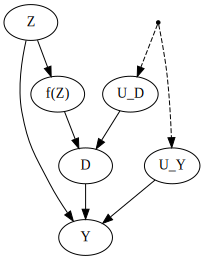

In [2]:
from causalgraphicalmodels import CausalGraphicalModel

G = CausalGraphicalModel(
    nodes=['Z', 'f(Z)', 'D', 'U_D', 'Y', 'U_Y'],
    edges=[
        ('Z', 'f(Z)'),
        ('Z', 'Y'),
        ('f(Z)', 'D'),
        ('U_D', 'D'),
        ('D', 'Y'),
        ('U_Y', 'Y')
    ],
    latent_edges=[
        ('U_D', 'U_Y')
    ]
)

G.draw()

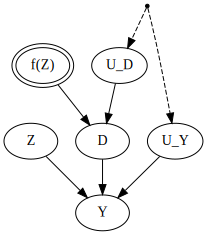

In [3]:
G_do_fZ = G.do('f(Z)')
G_do_fZ.draw()

Angrist and Lavy (1999) study of the effects of class size on student test performance. An additional class was added to a grade within a school when existing classes crossed a threshold size of 40 students. Such a discontinuity allows one to create a nonlinear function of enrollment to be used as an instrument for class size.

#### Panel Data
Multiple individuals are observed over time. When each individual's time series is sufficiently long, separate ITS analyses can be conducted for each individual and pooled to form an average causal effect estimate. Since individuals enter the treatment at different times, or not at all, it is possible to observe changes in $Y_t^0$ over time as some members of the population enter the treatment. In so far as $Y_t^0$ behaves similarly for all individuals in treatment and control groups, it is possible to predict the counterfactuals for members of the treatment group after entering the treatment.

Two-period, pretreatment-posttreatment panel data: Consists of nonequivalent treatment and control groups and two periods of data. The first wave of data is from pretreatment time period $t-1$ and the second is from posttreatment period $t$. It is assumed that changes over time in the control group can be used to adjust observed changes for the treatment group and the net change represents a consistent, unbiased estimate of the causal effect.  
Methods for adjusting for differences:  
* Change score: $Y_{it} - Y_{it - 1} = a + D^*_ic + e_i$ 
* Analysis of covariance: $Y_{it} = a + Y_{it - 1}b + D^*_ic + e_i$  

Catholic school effect with alternative estimators. Assume that (1) no Catholic elementary or middle schools exist, (2) all students consider entering public or Catholic high schools after the eighth grade, (3) a pretreatment achievement test score is available for the eighth grade.  
Potential outcome variables are $Y_{it}^1, Y_{it}^0$ for $t = \{8, 9, 10\}$, and treatment selection occurs before $t=9$.  
Eighth grade test scores are a pretreatment outcome that is observed for all students.

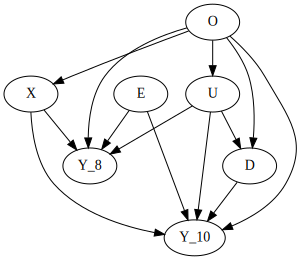

In [4]:
H = CausalGraphicalModel(
    nodes=['O', 'X', 'Y_8', 'E', 'U', 'D', 'Y_10'],
    edges=[
        ('O', 'X'),
        ('O', 'Y_8'),
        ('O', 'Y_10'),
        ('O', 'D'),
        ('O', 'U'),
        ('X', 'Y_8'),
        ('X', 'Y_10'),
        ('E', 'Y_8'),
        ('E', 'Y_10'),
        ('U', 'Y_8'),
        ('U', 'Y_10'),
        ('U', 'D'),
        ('D', 'Y_10')
    ]
)

H.draw()

$X$ is a composite determinant of achievement test scores in all years, with no direct effect on selection of schooling. $X = O + e_X$.  
$U$ is a composite variable of unobserved factors that determine Catholic school attendance and achievement scores in both periods. $U = O + e_U$.  
$O$ is a composite variable of ultimate background factors with effects on $U$ and $X$ as well as direct effects on Catholic school attendance and test scores in both periods. Standard normal with $\mu=0, \sigma^2 = 1$.  
$e_X, e_U$ are standard normal with $\mu =0, \sigma^2 = 1$.  
$E$ is a standard normal random variable that is a common cause of test scores in both periods, and is independent of all else.

Consider four types of treatment selection:  
1. Fixed on characteristics of individuals unrelated in any way to the outcomes before or after treatment.
2. Self-selection on the individual-specific treatment effect, assuming that students and parents are able to forecast accurately how much they would benefit from attending a Catholic school.
3. and 4. Students and parents choose Catholic schooling based on individual deviation from the expectation of the pretreatment test. Either believing that those with higher pretreatment test scores will be the most likely to benefit from Catholic schooling, or the least likely.

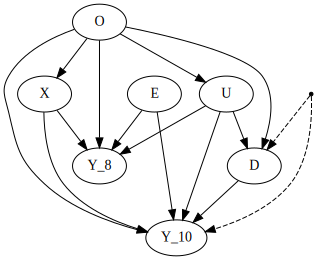

In [9]:
H_ss = CausalGraphicalModel(
    nodes=['O', 'X', 'Y_8', 'E', 'U', 'D', 'Y_10'],
    edges=[
        ('O', 'X'),
        ('O', 'Y_8'),
        ('O', 'Y_10'),
        ('O', 'D'),
        ('O', 'U'),
        ('X', 'Y_8'),
        ('X', 'Y_10'),
        ('E', 'Y_8'),
        ('E', 'Y_10'),
        ('U', 'Y_8'),
        ('U', 'Y_10'),
        ('U', 'D'),
        ('D', 'Y_10')
    ],
    latent_edges=[
        ('D', 'Y_10')
    ]
)

H_ss.draw() #Self-selection is equivalant to adding the bidirected edge

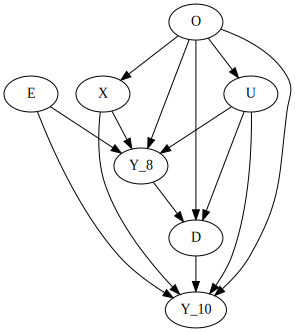

In [11]:
H_dev = CausalGraphicalModel(
    nodes=['O', 'X', 'Y_8', 'E', 'U', 'D', 'Y_10'],
    edges=[
        ('O', 'X'),
        ('O', 'Y_8'),
        ('O', 'Y_10'),
        ('O', 'D'),
        ('O', 'U'),
        ('X', 'Y_8'),
        ('X', 'Y_10'),
        ('E', 'Y_8'),
        ('E', 'Y_10'),
        ('U', 'Y_8'),
        ('U', 'Y_10'),
        ('U', 'D'),
        ('D', 'Y_10'),
        ('Y_8', 'D')
    ]
)

H_dev.draw() #Inidividual deviation is equivalent to adding the direct causal effect of Y_8 to D